# TP classification de sons à rendre

Tom Bevan (tom.bevan@etu.unice.fr)
Vinh Faucher (vinh.faucher@etu.unice.fr)

Polytech SI3 - SSII - 2021-22

# Données

Nous avons choisi 4 mots : gauche, droite, milieu, bas.
Pour chaque mot, nous avons au minimum 31 enregistrements différents.
Nous avons dû faire un prétraitement, afin notamment de convertir les fichiers en wav et pour certains de les découper.

In [1]:
#les imports nécessaires pour la suite
import matplotlib.pyplot as plt
import numpy as np 
import librosa
import librosa.display
import IPython.display as ipd
import glob

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


## Les données
On va utiliser le jeu de données <a href="https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html">"speech commands"</a>.

In [3]:
basedir=r".\Sons\\"
# à adapter selon l'ordinateur
classes = ["gauche", "droite", "milieu", "bas"] #Nos classes

In [4]:
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    print(len(listSons), "sons de la classe ", cl)

32 sons de la classe  gauche
33 sons de la classe  droite
29 sons de la classe  milieu
31 sons de la classe  bas


### On commence avec un seul son (au choix)
Charger le son

In [5]:
y, sr = librosa.load(listSons[0])

### Calcul des MFCCs du son

In [6]:
mfccFeatures = librosa.feature.mfcc(y,sr,n_mfcc=13)

In [7]:
mfccFeatures.shape

(13, 61)

## Calcul des MFCCs de tous les sons

### On va partir d'une base de 20 sons de chaque classe

In [13]:
nb=20
nbMFCCtotal = 0

for cl in classes:
    listSons = glob.glob(basedir+ cl+"/*.wav")
    for s in listSons[:nb]:
        print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(sig,rate,n_mfcc=13)
        print("MFCC: ", mfcc_feat.shape, "longueur du son : ", len(sig))
        nbMFCCtotal += mfcc_feat.shape[1]


### .\Sons\\gauche\AM_gauche.wav ###
MFCC:  (13, 69) longueur du son :  35280
### .\Sons\\gauche\AP_Gauche.wav ###
MFCC:  (13, 74) longueur du son :  37632
### .\Sons\\gauche\A_Gauche.wav ###
MFCC:  (13, 65) longueur du son :  32928
### .\Sons\\gauche\Gauche1.wav ###
MFCC:  (13, 108) longueur du son :  55125
### .\Sons\\gauche\Gauche10.wav ###
MFCC:  (13, 68) longueur du son :  34304
### .\Sons\\gauche\Gauche11.wav ###
MFCC:  (13, 164) longueur du son :  83456
### .\Sons\\gauche\Gauche12.wav ###
MFCC:  (13, 44) longueur du son :  22050
### .\Sons\\gauche\Gauche13.wav ###
MFCC:  (13, 35) longueur du son :  17640
### .\Sons\\gauche\Gauche14.wav ###
MFCC:  (13, 44) longueur du son :  22051
### .\Sons\\gauche\Gauche15.wav ###
MFCC:  (13, 35) longueur du son :  17643
### .\Sons\\gauche\Gauche16.wav ###
MFCC:  (13, 44) longueur du son :  22053
### .\Sons\\gauche\Gauche17.wav ###
MFCC:  (13, 83) longueur du son :  41984
### .\Sons\\gauche\Gauche18.wav ###
MFCC:  (13, 64) longueur du son :  32

In [14]:
lesMfcc = np.empty(shape=(nb*len(classes), 13), dtype=float) 
verbose=True

i=0
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        if verbose:
            print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(sig,rate,n_mfcc=13)
        if verbose:
            print("MFCC: ", mfcc_feat.shape, "len : ", len(sig))
        lesMfcc[i] = np.mean(mfcc_feat, axis=1)
        i += 1

if verbose:
    print("shape : ",lesMfcc.shape)


### .\Sons\\gauche\AM_gauche.wav ###
MFCC:  (13, 69) len :  35280
### .\Sons\\gauche\AP_Gauche.wav ###
MFCC:  (13, 74) len :  37632
### .\Sons\\gauche\A_Gauche.wav ###
MFCC:  (13, 65) len :  32928
### .\Sons\\gauche\Gauche1.wav ###
MFCC:  (13, 108) len :  55125
### .\Sons\\gauche\Gauche10.wav ###
MFCC:  (13, 68) len :  34304
### .\Sons\\gauche\Gauche11.wav ###
MFCC:  (13, 164) len :  83456
### .\Sons\\gauche\Gauche12.wav ###
MFCC:  (13, 44) len :  22050
### .\Sons\\gauche\Gauche13.wav ###
MFCC:  (13, 35) len :  17640
### .\Sons\\gauche\Gauche14.wav ###
MFCC:  (13, 44) len :  22051
### .\Sons\\gauche\Gauche15.wav ###
MFCC:  (13, 35) len :  17643
### .\Sons\\gauche\Gauche16.wav ###
MFCC:  (13, 44) len :  22053
### .\Sons\\gauche\Gauche17.wav ###
MFCC:  (13, 83) len :  41984
### .\Sons\\gauche\Gauche18.wav ###
MFCC:  (13, 64) len :  32256
### .\Sons\\gauche\Gauche19.wav ###
MFCC:  (13, 64) len :  32256
### .\Sons\\gauche\Gauche2.wav ###
MFCC:  (13, 31) len :  15435
### .\Sons\\gauche\Gauc

### Classification linéaire des sons

Il ne reste plus que l'étape de classification des sons. On va utiliser pour cela une méthode simple de classification linéaire: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">la régression logistique</a>.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# création de l'objet de regression logistique
logisticRegr = LogisticRegression()

# classes des sons:
yTrain = []
for clNumber in range(len(classes)):
    yTrain += [clNumber]*nb

# apprentissage de la séparation en utilisation des données pour lesquelles on connait la classe
logisticRegr.fit(lesMfcc, yTrain)


C:\Users\Vinh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(lesMfcc)

print(scaler.mean_)
print(scaler.scale_)

xTrain = scaler.transform(lesMfcc)

[-4.69089787e+02  8.63889294e+01  1.39268181e+01  1.89268923e+01
  1.78328517e+00  7.06519408e+00 -2.39426885e+00 -3.99301274e-01
 -4.65427798e+00  7.91415403e-01 -2.48054977e+00 -1.13191820e-01
 -3.19836352e+00]
[76.32810292 27.55803413 10.80640636 11.58393458  9.39365411  7.53728595
  7.70266053  7.26641346  5.59684665  4.74261308  6.5263291   4.46761364
  4.04859528]


In [27]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [28]:
ypred = logisticRegr.predict(xTrain)
print("train F1 score = ", f1_score(yTrain, ypred, average = 'micro'))
print("train accuracy score = ", accuracy_score(yTrain, ypred))


train F1 score =  0.7250000000000001
train accuracy score =  0.725


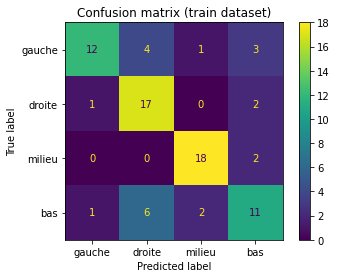

In [29]:
cm = confusion_matrix(yTrain, ypred, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.set_title('Confusion matrix (train dataset)')
plt.show()

### Evaluation de la classification

Pour évaluer de façon juste, on va utiliser des sons qui n'ont pas déjà servi à l'apprentissage. On va par exemple prendre les nb derniers de chaque classe.

In [30]:
lesMfccTest = np.empty(shape=(nb*len(classes), 13), dtype=float) 
verbose=True

i=0
for cl in classes:
    listSons = glob.glob(basedir+ cl+"/*.wav")
    for s in listSons[-nb:]:
        if verbose:
            print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(sig,rate,n_mfcc=13)
        if verbose:
            print("MFCC: ", mfcc_feat.shape, "len : ", len(sig))
        lesMfccTest[i] = np.mean(mfcc_feat, axis=1)
        i += 1

if verbose:
    print("shape : ",lesMfccTest.shape)
    
xTest = scaler.transform(lesMfccTest)
yTest = []
for clNumber in range(len(classes)):
    yTest += [clNumber]*nb

### .\Sons\\gauche\Gauche18.wav ###
MFCC:  (13, 64) len :  32256
### .\Sons\\gauche\Gauche19.wav ###
MFCC:  (13, 64) len :  32256
### .\Sons\\gauche\Gauche2.wav ###
MFCC:  (13, 31) len :  15435
### .\Sons\\gauche\Gauche20.wav ###
MFCC:  (13, 64) len :  32256
### .\Sons\\gauche\Gauche21.wav ###
MFCC:  (13, 98) len :  49664
### .\Sons\\gauche\Gauche22.wav ###
MFCC:  (13, 49) len :  24576
### .\Sons\\gauche\Gauche23.wav ###
MFCC:  (13, 75) len :  37888
### .\Sons\\gauche\Gauche24.wav ###
MFCC:  (13, 59) len :  29696
### .\Sons\\gauche\Gauche25.wav ###
MFCC:  (13, 87) len :  44100
### .\Sons\\gauche\Gauche26.wav ###
MFCC:  (13, 44) len :  22053
### .\Sons\\gauche\Gauche27.wav ###
MFCC:  (13, 61) len :  30870
### .\Sons\\gauche\Gauche28.wav ###
MFCC:  (13, 100) len :  50715
### .\Sons\\gauche\Gauche3.wav ###
MFCC:  (13, 44) len :  22050
### .\Sons\\gauche\Gauche4.wav ###
MFCC:  (13, 52) len :  26460
### .\Sons\\gauche\Gauche5.wav ###
MFCC:  (13, 44) len :  22050
### .\Sons\\gauche\Gauche6.w

In [31]:
predTest = logisticRegr.predict(xTest)
print("test F1 score = ", f1_score(yTest, predTest, average = 'micro'))
print("test accuracy score = ", accuracy_score(yTest, predTest))


test F1 score =  0.6625
test accuracy score =  0.6625


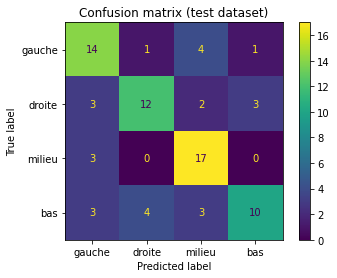

In [32]:
cm = confusion_matrix(yTest, predTest, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.set_title('Confusion matrix (test dataset)')
plt.show()